### Finishing up Fourier Transforms
Last time we looked at Fourier transforms of analytic functions and discrete Fourier transforms. The discrete transforms don't require a smooth function and can be applied in cases where we only know the function at specific points. We take measurements and use Fourier analysis on the data. Not only can we represent functions, we can also search data for significant periodic signals which may be difficult to see with the eye.

Most of what we did last time involved using the full, complex Fourier transform approach involving both sine and cosine functions, combined into exponential functions with complex coefficients. There are also discrete cosine and sine transforms. In particular, the discrete cosine transform has many, many applications. Since cosines are appropriate for functions or intervals that are symmetric about a midpoint, the approach can be applied by mirroring a function, computing the cosine transform to represent the function, and using it to reprsent the function or data in the first half of the interval that we are interested in. (Similarly, sine transforms can be used for functions or data that are zero at the endpoints, like oscillating strings on instruments.) The cosine transform is much more common.

### Exercise
I want you to appreciate just how enormously useful Fourier transforms are, and to appreciate just how often we encounter or rely on Fourier transforms without even knowing it. After reading Section 7.3, list several examples of how Fourier transforms (in particular, cosine transforms) are present in our everyday experiences.
### ANSWER: Some examples that utilize discrete cosine transforms are the JPEG image file format, the MPEG video file format, and the mp3 audio file format. All of these files employ the discrete cosine transform as a method of lossy compression. This dramatically reduces the file size while maintaining enough information that the compressed file is indistinguishable from the uncompressed file to a the human senses. Since any distrete set of points can be made a symmetric function by mirroring across an axis, any function can be represented by the discrete cosine transform, which has real components.


### Fast Fourier Transforms
Last time, we looked at some implementations of Fourier transforms from the numpy.fft package. These actually implement something called Fast Fourier Transforms. We won't go into the math here. The textbook goes through this. It is a bit complicated and you will need to work through carefully if you need to implement it, or some technique related to it. Let us just consider, briefly, some information about it and understand it's advantages.

The main advantage of a fast Fourier transform (FFT) is speed. By some mathematical rearrangement, the number of calculations can be reduced significantly. (This is discussed in Section 7.4, especially the top of p. 313.) Instead of requiring $\frac{1}{2}N^{2}$ calculation to do a Fourier analysis a fast Fourier transform requires $N \log_{2}(N)$ steps. This allows calculations with much larger numbers of coefficients in a reasonable time. If a normal Fourier analysis takes 5x$10^{11}$ operations which will take awhile, a FFT will only take 2x$10^{7}$ operations which will be faster by several orders of magnitude! Without using the mathematical "trickery" to derive Fast Fourier Transforms Fourier analysis would be too slow to be very useful in many case.

### One more observation
In this chapter we have explored Fourier representation of functions. Fourier analysis represents functions using cosine and sine functions which form a set of orthogonal functions. There are many other classes of orthogonal functions (Legendre polynomials, spherical harmonics, bessel functions, spherical bessel functions, etc.) that are useful in similar ways depending on the geometry.

# Ch. 8 - Ordinary Differential Equations
Next time we will look more closely at methods of solving differential equations. To get started, let's first look at a few examples from the text and compare them. In the following cells you will find Euler's method and a second order Runge-Kutta method. (Euler's method is really a $1^{st}$ order Runge-Kutta method.) The order is related to the speed and accuracy we can achieve. But there are other important considerations such as step size as well. Let's compare the simplest method for numerical solutions, Euler's method, with a 2nd order Runge-Kutta method.

In this chapter, we explore how to solve differential equations. We will begin by an outline of the derivation of one numerical method and some general discussion. This notebook is meant to explore the advantages of the different methods and factors that are important when choosing an appropriate method. Mainly we will focus on Runge-Kutta methods and later learn about some alternative approaches. 

### First-order differential equations with one variable
Let's start by designing a method for solving equations of the form
$$
\frac{dx}{dt} = f \left( x,t \right).
$$
To clarify, it is first-order because it involves a first derivative. The function $f(x,t)$ will be known for each specific case. We are not solving $f(x,t)$. We are solving for a function $x(t)$ for which the derivative is $f(x,t)$. To solve this equation, in addition to $f(x,t)$, it is necessary to have one more piece of information, a boundary condition. That is the value of $x(t)$ at on specific value of t (often t=0). Let's look at the simplest numerical solution method.

### Euler's method
The solution is some function $x(t)$. We can write its Taylor expansion generically as
$$
x(t+h) = x(t) + h\frac{dx}{dt} + \frac{1}{2}h^{2}\frac{d^{2}x}{dt^{2}} + ... \\
       = x(t) + hf(x,t) + O(h^{2})
$$
Remember $f(x,t)$ is the derivative. Since h is a very small number, by choice, we will drop the order h^{2} terms leaving
$$
x(t+h) = x(t) + hf(x,t)
$$
Using our boundary condition, starting with value of $x(t_{0})$ at $t_{0}$ we can compute value of our solution a short interval, h, later. Then iterate. x(t) becomes x(t+h) and we can solve for x(t+2h). Repeat.

### Exercise
Solve this last equation for f(x,t). What if you took the limit of this expression as h approaches zero? Does this make sense, given that $dx/dt = f(x,t)$? Is this too easy?
### ANSWER: This makes sense, it's just the definition of the derivative.
$$
f(x,t)=\lim_{x\to 0}\frac{x(t+h)-x(t)}{h}
$$



___________________________

We will see other methods that are better, more efficient, more accurate, etc. But this will work. 

Let's look at the implementation of this ine Example 8.1 Euler's method to solve
$$
\frac{dx}{dt} = -x^{3} + \sin{t}
$$
with the initial condition $x = 0$ at $t = 0$. We will integrate from $t=0$ to $t=10$ in 1000 steps.

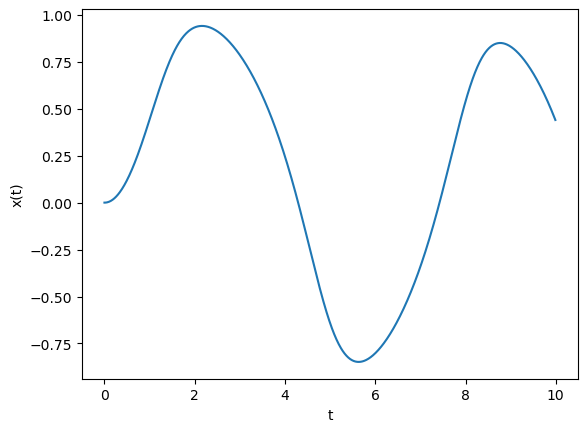

In [26]:
# Euler's method (also a 1st order Runge-Kutta method!)
from math import sin
from numpy import arange
from pylab import plot, xlabel, ylabel, show

def f(x,t):
    return -x**3 + sin(t)

a = 0.0         # Start of the interval
b = 10.0        # End of the interval
N = 1000      # Number of steps
h = (b-a)/N     # Size of a single step
x = 0.0         # Initial condition

tpoints = arange(a,b,h)
xpoints = []
for t in tpoints:
    xpoints.append(x)
    x += h*f(x,t)

plot(tpoints,xpoints)
xlabel("t")
ylabel("x(t)")
show()

### Exercise
Adjust the number of steps in your solution, above. How does this affect distance between points in your solution? How is the number of steps related to the quality/accuracy of your solution? 
### ANSWER: Increasing N decreases the distance between points in the solution. This decrease in the distance improves the quality/accurary of the solution since the computed solution has more points that fit more closely to the actual solution.

### Exercise
If you make N too big, will the spacing between points become an issue? Why?

### ANSWER: No, this will only increase the accuracy of the solution. This is because the error is approximated by an integral
$$
\approx\frac{1}{2}h\int_a^b\frac{df}{dt}dt
$$
### which becomes a better approximation as h gets small, when N is very large. However, this will increase the computation time significantly.
_____________________

For ordinary differential equations there more efficient methods that are not much more difficult. However, for partial differential equations Euler's method is used much more often.

Because we dropped the $O(h^{2})$ terms in the Taylor expansion, that term $\frac{1}{2}h^{2}d^{2}x/dt^{2}$, is an estimate of the error on each step in our solution. If we reduce h (increase N steps), the error on each term decreases. However, we will take more steps and add up (or integrate) all these errors. **It turns out, for Euler's method, the error is linear in h (see text for detail).** If we want half the error, we can double the steps. But that would double the time to compute the solution. 

### The Runge-Kutta method
The Runge-Kutta method is really a set of methods. They have different orders. Each order describes the order of accuracy. In fact, Euler's method is a $1^{st}$ order Runge-Kutta method. It is accurate to order h overall. The error on each step is order $h^{2}$. 

Rather than keeping higher-order terms in the Taylor expansion, which may give more accurate solutions, we can try something else. 

Let us develop a second order Runge-Kutta method (or *mid-point method*) as follows. Instead of Taylor expansion about t=0, let us Taylor expand about the midpoint of the interval t=0 to t+h. That is the midpoint of our step size which is at $t+\frac{1}{2}h$. We can do this to get an expansion for $x(t+h)$ and for $x(t)$, which are Eq. 8.10 and 8.11 in the text.
$$
x(t+h) = x\left( t + \frac{1}{2}h \right) + \frac{1}{2}h \left(\frac{dx}{dt} \right)_{t+\frac{1}{2}h} + \frac{1}{8}h^{2}\left(\frac{d^{2}x}{dt^{2}} \right)_{t+\frac{1}{2}h} + O(h^{3})
$$
and
$$
x(t) = x\left( t + \frac{1}{2}h \right) - \frac{1}{2}h \left(\frac{dx}{dt} \right)_{t+\frac{1}{2}h} + \frac{1}{8}h^{2}\left(\frac{d^{2}x}{dt^{2}} \right)_{t+\frac{1}{2}h} + O(h^{3})
$$
Subtract these. See that the terms $x\left(t+\frac{1}{2}\right)$ cancel, as do the terms with $h^{2}$. This leaves Eq. 8.12
$$
x(t+h) = x(t) + h \left(\frac{dx}{dt} \right)_{t+\frac{1}{2}h} + O(h^{3}) \\
       = x(t) + h \ f \left( x(t+\frac{1}{2}h), t+\frac{1}{2}h \right) + O(h^{3}).
$$
The derivative was replaced using the original differential equation, $dx/dt = f(x,t)$, evaluated at $t+\frac{1}{2}h$. 

Here is the trick and why it works. We don't know $x(t+h/2)$. We only know the initial condition, x(t_{0}) at t_{0}. We can estimate $x\left( t+\frac{1}{2}h\right)$ using Euler's method: $x\left( t+\frac{1}{2}h\right) = x(t) + \frac{1}{2}hf(x,t)$. 
While Euler's method was only accurate to $O(h^{2})$ for each step, it only is used here in a term multplied by h. So the error for each step is still $O(h^{3}$. We use the less accurate method as a stepping stone to a more accurate method. The whole algorithm is summarized in three lines
$$
k_{1} = hf(x,t) \\
k_{2} = hf(x+\frac{1}{2}k_{1}, t+\frac{1}{2}h) \\
x(t+h) = x(t) + k_{2}
$$
Put this in a for loop over $t$, in steps of siza $h$.


Below is a second order Runge-Kutta method with fewer steps.
### Exercise
How does the solution with fewer steps compare to the Euler method above?
### ANSWER: the solution with fewer steps is comparable to the Euler method, with the decreased number of steps improving the computation time significantly.

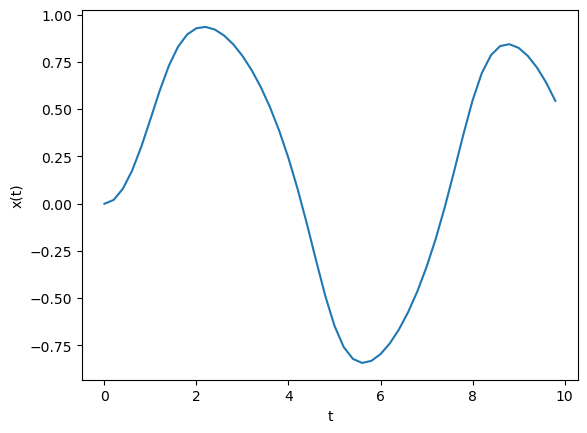

In [27]:
# 2nd order Runge-Kutta method
from math import sin
from numpy import arange
from pylab import plot,xlabel,ylabel,show

def f(x,t):
    return -x**3 + sin(t)

a = 0.0
b = 10.0
N = 50
h = (b-a)/N

tpoints = arange(a,b,h)
xpoints = []

x = 0.0
for t in tpoints:
    xpoints.append(x)
    k1 = h*f(x,t)
    k2 = h*f(x+0.5*k1,t+0.5*h)
    x += k2

plot(tpoints,xpoints)
xlabel("t")
ylabel("x(t)")
show()


In the next cell, I have implemented Euler method and a second order Runge-Kutta method as functions. You can input the start (a) and end (b) of your solution interval and the number of steps.
### Exercise
The Euler method earlier (1st order Runge-Kutta method) used N=1000 steps to achieve a good solution to our differential equation. Use these to compare, on the same plot, the Euler method with different number of steps. On a different plot try comparing Runge-Kutta with different numbers of steps. (Example: repeat the 2nd order Runge-Kutta method for N = 10, 20, 30, 50, 100 steps, or just a few of these perhaps.
### ANSWER

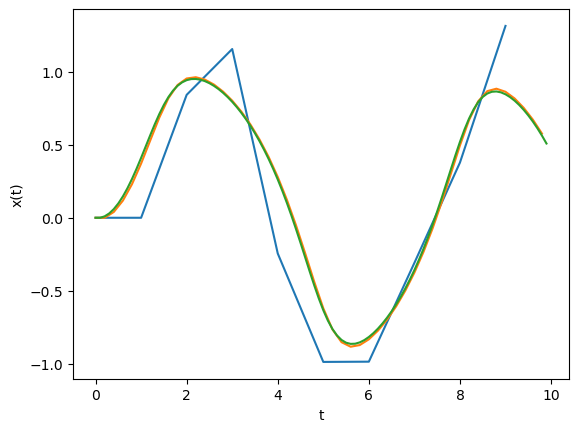

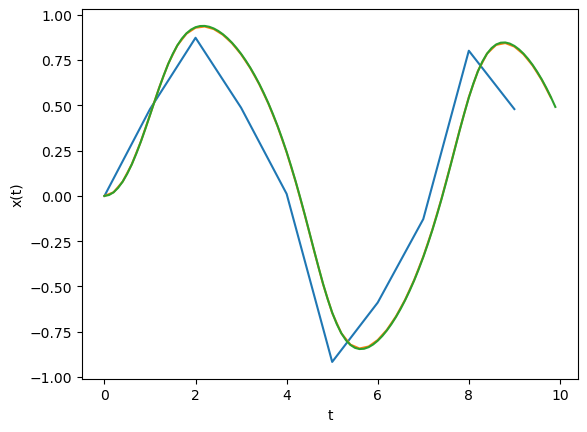

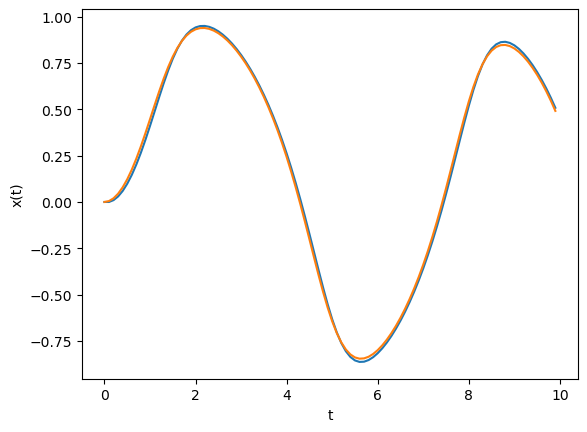

In [28]:
def euler(a,b,N):
    h = (b-a)/N     # Size of a single step
    x = 0.0         # Initial condition
    
    tpoints = arange(a,b,h)
    xpoints = []
    for t in tpoints:
        xpoints.append(x)
        x += h*f(x,t)
    return tpoints,xpoints

def runge_kutta2(a,b,N):
    h = (b-a)/N
    tpoints = arange(a,b,h)
    xpoints = []
    
    x = 0.0
    for t in tpoints:
        xpoints.append(x)
        k1 = h*f(x,t)
        k2 = h*f(x+0.5*k1,t+0.5*h)
        x += k2
    return tpoints,xpoints

Euler_t_10,Euler_x_10 = euler(0.,10.,10)
Euler_t_50,Euler_x_50 = euler(0.,10.,50)
Euler_t_100,Euler_x_100 = euler(0.,10.,100)

plot(Euler_t_10,Euler_x_10)
plot(Euler_t_50,Euler_x_50)
plot(Euler_t_100,Euler_x_100)
xlabel("t")
ylabel("x(t)")
show()

RK2_t_10,RK2_x_10 = runge_kutta2(0.,10.,10)
RK2_t_50,RK2_x_50 = runge_kutta2(0.,10.,50)
RK2_t_100,RK2_x_100 = runge_kutta2(0.,10.,100)


plot(RK2_t_10,RK2_x_10)
plot(RK2_t_50,RK2_x_50)
plot(RK2_t_100,RK2_x_100)
xlabel("t")
ylabel("x(t)")
show()

plot(Euler_t_100,Euler_x_100)
plot(RK2_t_100,RK2_x_100)
xlabel("t")
ylabel("x(t)")
show()


### Exercise
Implement the fourth order Runge-Kutta method from Example 8.3, as a function. Compare on a single plot, the Euler and 2nd and 4th order Runge-Kutta methods. Try some different step sizes for the different cases to investigate which method gets more accurate solutions faster.
### ANSWER (code in the next cell)


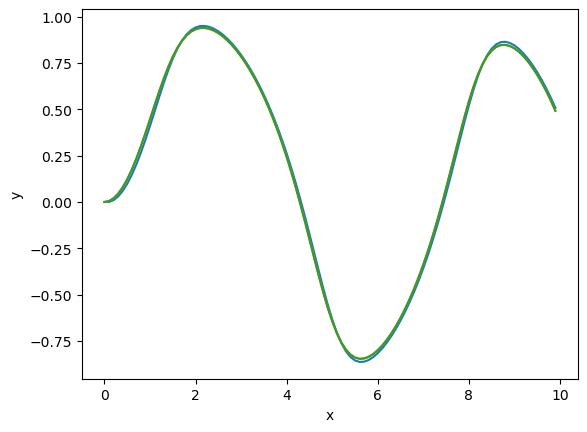

In [29]:
from math import sin
from numpy import arange
from pylab import plot, xlabel, ylabel, show

def f(x, t):
    return -x**3 + sin(t)

a = 0.0
b = 10.0
N = 100
h = (b-a)/N

def RK4(a, b, N):
    tpoints = arange(a, b, h)
    xpoints = []
    x = 0.0
    for t in tpoints:
        xpoints.append(x)
        k1 = h*f(x, t)
        k2 = h*f(x+0.5*k1, t+0.5*h)
        k3 = h*f(x+0.5*k2, t+0.5*h)
        k4 = h*f(x+k3, t+h)
        x += (k1+2*k2+2*k3+k4)/6
    return tpoints, xpoints

euler_sol = euler(a, b, N)
rk2_sol = runge_kutta2(a, b, N)
rk4_sol = RK4(a, b, N)

#Now we plot against euler and 2nd order methods
#Euler Solution
plot(euler_sol[0], euler_sol[1])
#RK2 Solution
plot(rk2_sol[0], rk2_sol[1])
#RK4 Solution
plot(rk4_sol[0], rk4_sol[1])
xlabel("x")
ylabel("y")
show()

A few more comments on Runge-Kutta. The fourth order Runge-Kutta method uses the lower order ones as a stepping stone to the more accurate one. The trade off is that the math to derive it gets very messy. The textbook deals with that by skipping it. We shall too. 

The $4^{th}$ order Runge-Kutta method is the most used method for solving ordinary differential equations. It is accurate to terms of order $h^{4}$ with errors of order $h^{5}$. It is usually the first method to try. Of course, if you are doing research it might be worth exploring and comparing different solutions. Comparing different methods might give you some insight into the reliability of your solutions.

## Solutions over infinite ranges
So far, we have solved differential equations over a finite interval (a,b). We can split this inverval into N=(b-a)/h steps. If the range of integration is infinite, however, this will create a problem. We would require an infinite number of steps. There is a way around this, similar to doing numerical integrals with infinite ranges. We can use the following change of variables (which often works):
$$
u = \frac{t}{1+t} \quad \text{or equivalently} \quad \frac{u}{1-u}
$$
### Exercise
If the interval for t is $t=0$ to $t=\infty$, what are the corresponding limits for u? I think this might be a case where L'Hopital's rule might be useful. 
### ANSWER: As t approaches 0, u approaches $\frac{0}{1}=0$. For the upper limit, as t goes to infinity u goes to $\frac{\infty}{\infty}$, so applying L'hopital's rule: $\frac{1}{1}=1$. So the limits for the change of variables is u=0 and u=1.

__________________________

so as $t \rightarrow \infty$ we see $u \rightarrow 1$. In our differential equation,
$$
\frac{dx}{dt} = f(x,t)
$$
We can use the chain rule from calculus to compute 
$$
\frac{dx}{du}= \left( \frac{du}{dt} \right) ^{-1} f(x,u)
$$
were we subtituted for t in f(x,t). This can be solved for x(u) and then use t = u/(1-u) to convert it x(t) instead. 

In the following exercise, you can see how this works by solving
$$
\frac{dx}{dt} = \frac{1}{x^{2}+t^{2}}.
$$

### Exercise
In the cell below, enter the code from textbook Example 8.4.
### ANSWER (code in next cell)

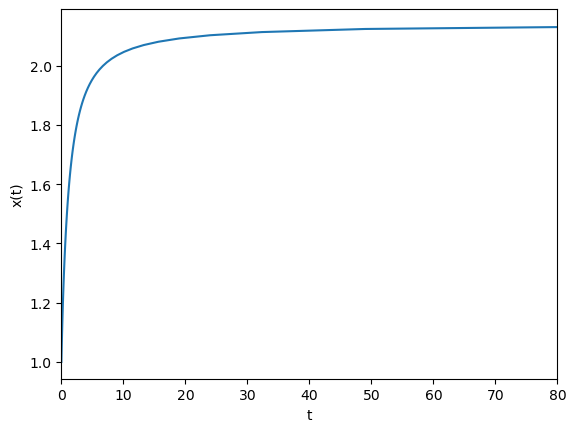

In [30]:
from numpy import arange
from pylab import plot, xlabel, ylabel, xlim, show

def g(x, u):
    return 1/(x**2*(1-u)**2+u**2)

a = 0.0
b = 1.0
N = 100
h = (b-a)/N

upoints = arange(a, b, h)
tpoints = []
xpoints = []

x=1.0
for u in upoints:
    tpoints.append(u/(1-u))
    xpoints.append(x)
    k1 = h*g(x, u)
    k2 = h*g(x+0.5*k1, u+0.5*h)
    k3 = h*g(x+0.5*k2, u+0.5*h)
    k4 = h*g(x+k3, u+h)
    x += (k1+2*k2+2*k3+k4)/6

plot(tpoints, xpoints)
xlim(0, 80)
xlabel("t")
ylabel("x(t)")
show()

### Exercise
Which algorithm is implemented in this example? Euler, $2^{nd}$ order Runge-Kutta, $4^{th}$ order Runge-Kutta, etc.
### ANSWER: This is the RK4 algorithm.

_________________

Notice that we are solving the differential equation using x(u), but for each value of u we compute a value of t=u/(1-u). At the end we can just plot x values against the corresponding t values which is what we wanted originally, x(t).

Be aware that there are other change of variables that may work (as was the case with integrals to infinity). This substitution t=u/(1-u) is often a good first try, but it doesn't always work. In that case you will have to look for a different substitution.

## Differential equations with more than one variable
Python makes this remarkably simple because of how it treats arrays. Say we have a system of two differential equations
$$
\frac{dx}{dt} = xy-x, \qquad \qquad \frac{dy}{dt} = y - xy + \sin^{2}\omega t.
$$
where there is still one *independent* variable, t, but two dependent solutions x(t) and y(t). That means these are two ordinary differential equations, not partial differential equations.

Write these as
$$
\frac{dx}{dt} = f_{x}(x,y,t), \qquad \qquad \frac{dy}{dt} = f_{y}(x,y,t).
$$
which may be nonlinear funtions of x, y, and t. We could have more equations and more unknowns. No matter the size of our system of differential equations we can write them in vector notation (in Python) as
$$
\frac{d\mathbf{r}}{dt} = f(\mathbf{r},t)
$$
This is the exact same *form* as a single, rather than a system. The difference is $\mathbf{r} = (x,y,...)$ which are functions of t and also **f** is a vector, $\mathbf{f}(\mathbf{r},t) = (f_{x}(\mathbf{r},t), f_{y}(\mathbf{r},t),...).

The Taylor expansions take the same form and derivations of the Euler method, or higher-order Runge-Kutta methods are the same, except instead of a single solution x(t), we find a whole set of solutions, $\mathbf{r}(t)$. 

Here is the code from Example 8.5 to solve a system of differential equations.

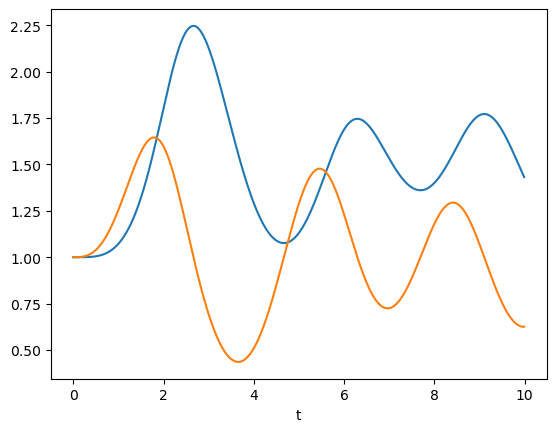

In [31]:
from math import sin
from numpy import array,arange
from pylab import plot,xlabel,show

def f(r,t):
    x = r[0]
    y = r[1]
    fx = x*y - x
    fy = y - x*y + sin(t)**2
    return array([fx,fy],float)

a = 0.0
b = 10.0
N = 1000
h = (b-a)/N

tpoints = arange(a,b,h)
xpoints = []
ypoints = []

r = array([1.0,1.0],float)
for t in tpoints:
    xpoints.append(r[0])
    ypoints.append(r[1])
    k1 = h*f(r,t)
    k2 = h*f(r+0.5*k1,t+0.5*h)
    k3 = h*f(r+0.5*k2,t+0.5*h)
    k4 = h*f(r+k3,t+h)
    r += (k1+2*k2+2*k3+k4)/6
    
plot(tpoints,xpoints)
plot(tpoints,ypoints)
xlabel("t")
show()

### Exercise
Compare this implementation with the fourth order Runge-Kutta method you implemented above. Note a few difference in your answer. But, also recognize just how similar they are.
### ANSWER: These implementations are almost exactly the same, but vector functions are used rather than scalar functions. This translates very well in Python, with the only difference is that each coordinate must be accounted for.

___________________

This implementation could easily be extended to a much larger system of equations. Make your *r* array bigger, at variables besides x and y and equations beyond fx and fy, and additional arrays besides xpoints and ypoints. That's about it!

If you want to try Exercise 8.2, you can probably use the code above an solve it in a few minutes. It was my class project in Computational Physics. It is a bit more complicated in C++. Python makes it so much simpler to implement. Also, it turns out that the Lotka-Volterra equations are a subset of a more general set of differential equations that describe pandemics, like the SIR or SIRS models. The $r_{0}$ value you may have heard of is related to the coefficient $\gamma$ of the term $xy$ term.

## Second-order differential equations
We are about to see something else that seems like magic. Like many of the other powerful "tricks" we have seen it is just implementing a simple calculus fact. But it takes a seemingly complicated task and makes it almost trivial. 

Write a second-order differential equation (the most common case in physics)
$$
\frac{d^{2}x}{dt^{2}} = f\left( x,\frac{dx}{dt},t \right).
$$
If we define and substitute for the derivative
$$
\frac{dx}{dt} = y
$$
we get
$$
\frac{dy}{dt} = f(x,y,t)
$$
The remarkable thing is these last two equations are a system of two first-order diffential equations. They are equivalent to the original second-order equation. We just saw how to solve a system of first-order differential equations. 

You can do the same thing with even higher-order equations. If you start with a system of n equations, each of $m^{th}$-order, you can reduce them to m x n simultaneous first-order equations. The text shows how to do this for a third-order differential equation and for a set of simultaneous second-order differential equations.

For some specific examples see Section 8.3 in the textbook, including for a nonlinear pendulum. Several of the textbook problems in Section 8.3 are common problems in a Classical Mechanics class. Exercise 8.9 often shows up in graduate Classical Mechanics.

## 8.4 Varying the step size (We will come back to this.)

## 8.5 Other methods
We will not go through all the other solution methods. Fourth-order Runge-Kutta methods will work fine in many cases. But it is worth knowing that other methods exist. The will have their own advantages and disadvantages. If you run into issues with the usual methods, these might be a good place to start looking for possible way forward. Or if you are looking for alternative methods you might consider these. Here are a few the textbook discusses:
1. Leapfrog method
2. Time reversal and energy conservation
3. The Verlet method
4. The modified-midpoint method
5. The Bulirsch-Stoer method (and discussion of interval size)

## END OF THIS NOTEBOOK

In [32]:
from numpy import array,arange

g = 9.81          # Acceleration due to gravity
a = 0.0           # Initial time
b = 10.0          # Final time
N = 1000          # Number of Runge-Kutta steps
h = (b-a)/N       # Size of Runge-Kutta steps
target = 1e-10    # Target accuracy for binary search

def f(r):
    x = r[0]
    y = r[1]
    fx = y
    fy = -g
    return array([fx,fy],float)

# Function to solve the equation and calculate the final height
def height(v):
    r = array([0.0,v],float)
    for t in arange(a,b,h):
        k1 = h*f(r)
        k2 = h*f(r+0.5*k1)
        k3 = h*f(r+0.5*k2)
        k4 = h*f(r+k3)
        r += (k1 + 2*k2 + 2*k3 + k4)/6
    return r[0]

# Main program performs a binary search
v1 = 0.01
v2 = 1000.0
h1 = height(v1)
h2 = height(v2)

while abs(h2-h1) > target:
    vp = (v1+v2)/2
    hp = height(vp)
    if h1*hp > 0:
        v1 = vp
        h1 = hp
    else:
        v2 = vp
        h2 = hp

v = (v1+v2)/2
print("The required initial velocity is",v,"m/s")

The required initial velocity is 49.04999999999815 m/s
